<a href="https://colab.research.google.com/github/arduinojinarendra/arduino/blob/main/monticoli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv("/content/germany-wind-energy.csv")
df

,utc_timestamp,wind_generation_actual,wind_capacity,temperature
0,2017-01-01 00:00:00+00:00,291760.0,37149.130,-2.117
1,2017-01-02 00:00:00+00:00,295097.0,37152.125,-1.154
2,2017-01-03 00:00:00+00:00,666170.0,37155.208,-0.239
3,2017-01-04 00:00:00+00:00,686581.0,37160.125,0.620
4,2017-01-05 00:00:00+00:00,261759.0,37163.542,-3.908
...,...,...,...,...
1089,2019-12-26 00:00:00+00:00,132739.0,50424.125,2.790
1090,2019-12-27 00:00:00+00:00,146590.0,50427.000,1.327
1091,2019-12-28 00:00:00+00:00,159126.0,50427.292,-1.441
1092,2019-12-29 00:00:00+00:00,349839.0,50434.750,-1.314


Epoch 1/20
14/14 [==============================] - 4s 34ms/step - loss: 0.0986
Epoch 2/20
14/14 [==============================] - 0s 35ms/step - loss: 0.0469
Epoch 3/20
14/14 [==============================] - 0s 35ms/step - loss: 0.0440
Epoch 4/20
14/14 [==============================] - 1s 35ms/step - loss: 0.0419
Epoch 5/20
14/14 [==============================] - 0s 35ms/step - loss: 0.0417
Epoch 6/20
14/14 [==============================] - 1s 38ms/step - loss: 0.0417
Epoch 7/20
14/14 [==============================] - 0s 34ms/step - loss: 0.0417
Epoch 8/20
14/14 [==============================] - 1s 37ms/step - loss: 0.0418
Epoch 9/20
14/14 [==============================] - 1s 101ms/step - loss: 0.0415
Epoch 10/20
14/14 [==============================] - 1s 95ms/step - loss: 0.0415
Epoch 11/20
14/14 [==============================] - 1s 76ms/step - loss: 0.0418
Epoch 12/20
14/14 [==============================] - 1s 37ms/step - loss: 0.0422
Epoch 13/20
14/14 [=================

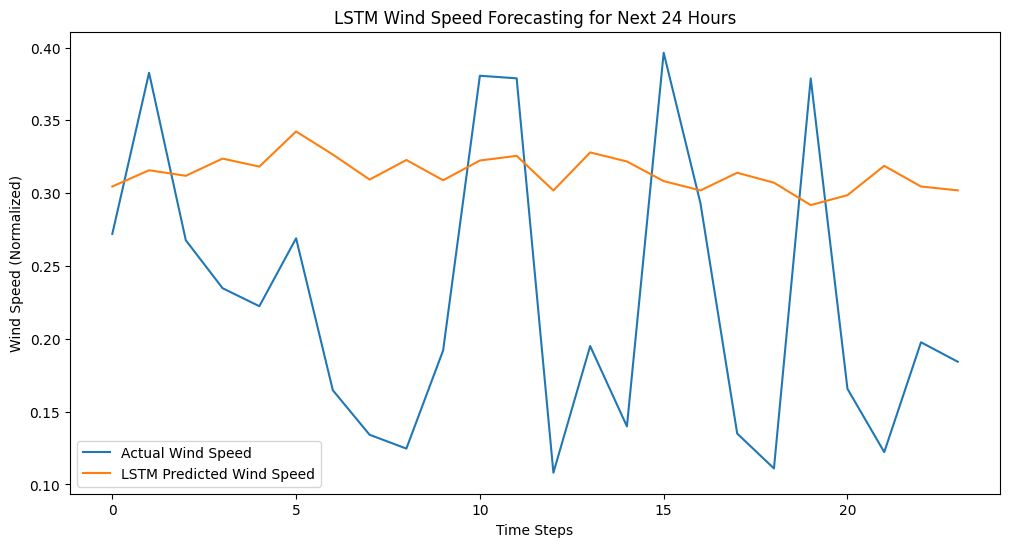

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from tensorflow import keras
from tensorflow.keras import layers

# Load your dataset
df = pd.read_csv("/content/germany-wind-energy.csv")

# Extract wind speed data
wind_speed = df["wind_generation_actual"].values

# Data preprocessing
scaler = MinMaxScaler()
wind_speed = scaler.fit_transform(wind_speed.reshape(-1, 1))

# Create sequences of data
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length - 24):  # Predicting the next 24 hours
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length:i + seq_length + 24])
    return np.array(X), np.array(y)

sequence_length = 24  # Adjust as needed
X, y = create_sequences(wind_speed, sequence_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.80)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
lstm_model = keras.Sequential()
lstm_model.add(layers.LSTM(units=64, activation='tanh', return_sequences=True, input_shape=(sequence_length, 1)))
lstm_model.add(layers.LSTM(units=64, activation='tanh'))
lstm_model.add(layers.Dense(24))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

# Train the LSTM model
lstm_model.fit(X_train, y_train, epochs=20, batch_size=64)

# Make predictions with LSTM
lstm_pred = lstm_model.predict(X_test)

# Calculate RMSE for LSTM
# Calculate RMSE for LSTM
y_test_1d = y_test.reshape(-1)
lstm_pred_1d = lstm_pred.reshape(-1)
lstm_rmse = sqrt(mean_squared_error(y_test_1d, lstm_pred_1d))
print(f"LSTM RMSE: {lstm_rmse}")


# Continue with GRU, RNN, and CNN models, and plotting for comparison

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test[0], label='Actual Wind Speed')
plt.plot(lstm_pred[0], label='LSTM Predicted Wind Speed')
plt.legend()
plt.title('LSTM Wind Speed Forecasting for Next 24 Hours')
plt.xlabel('Time Steps')
plt.ylabel('Wind Speed (Normalized)')
plt.show()


Epoch 1/50
11/11 [==============================] - 7s 133ms/step - loss: 0.0906 - val_loss: 0.1388
Epoch 2/50
11/11 [==============================] - 1s 65ms/step - loss: 0.0493 - val_loss: 0.0819
Epoch 3/50
11/11 [==============================] - 1s 65ms/step - loss: 0.0421 - val_loss: 0.0840
Epoch 4/50
11/11 [==============================] - 1s 68ms/step - loss: 0.0393 - val_loss: 0.0725
Epoch 5/50
11/11 [==============================] - 1s 66ms/step - loss: 0.0363 - val_loss: 0.0612
Epoch 6/50
11/11 [==============================] - 1s 64ms/step - loss: 0.0333 - val_loss: 0.0701
Epoch 7/50
11/11 [==============================] - 1s 65ms/step - loss: 0.0323 - val_loss: 0.0564
Epoch 8/50
11/11 [==============================] - 1s 67ms/step - loss: 0.0315 - val_loss: 0.0559
Epoch 9/50
11/11 [==============================] - 1s 65ms/step - loss: 0.0307 - val_loss: 0.0548
Epoch 10/50
11/11 [==============================] - 1s 64ms/step - loss: 0.0298 - val_loss: 0.0663
Epoch 11

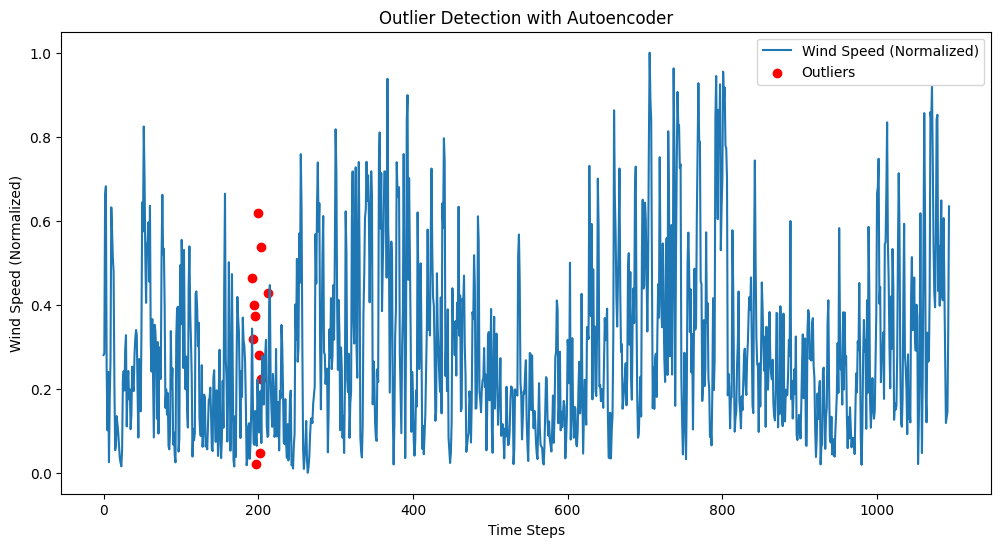

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from tensorflow.keras import layers

# Load your dataset
df = pd.read_csv("/content/germany-wind-energy.csv")

# Extract wind speed data
wind_speed = df["wind_generation_actual"].values

# Data preprocessing
scaler = MinMaxScaler()
wind_speed = scaler.fit_transform(wind_speed.reshape(-1, 1))

# Create sequences of data
def create_sequences(data, seq_length):
    X = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
    return np.array(X)

sequence_length = 24  # Adjust as needed
X = create_sequences(wind_speed, sequence_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.80)
X_train, X_test = X[:train_size], X[train_size:]

# Build the autoencoder model
model = keras.Sequential()
model.add(layers.InputLayer(input_shape=(sequence_length, 1)))
model.add(layers.LSTM(64, activation='relu', return_sequences=True))
model.add(layers.LSTM(32, activation='relu', return_sequences=False))
model.add(layers.RepeatVector(sequence_length))
model.add(layers.LSTM(32, activation='relu', return_sequences=True))
model.add(layers.LSTM(64, activation='relu', return_sequences=True))
model.add(layers.TimeDistributed(layers.Dense(1)))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the autoencoder
model.fit(X_train, X_train, epochs=50, batch_size=64, validation_split=0.2)

# Calculate reconstruction errors for the test set
reconstruction_errors = [mean_squared_error(X_test[i], model.predict(X_test[i:i+1])[0]) for i in range(len(X_test))]

# Define a threshold for outlier detection (e.g., use a percentile)
threshold = np.percentile(reconstruction_errors, 95)  # Adjust the percentile as needed

# Detect outliers
outliers = [i for i, error in enumerate(reconstruction_errors) if error > threshold]

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(wind_speed, label='Wind Speed (Normalized)')
plt.scatter(outliers, wind_speed[train_size+np.array(outliers)], color='red', label='Outliers')
plt.legend()
plt.title('Outlier Detection with Autoencoder')
plt.xlabel('Time Steps')
plt.ylabel('Wind Speed (Normalized)')
plt.show()


Epoch 1/20
14/14 [==============================] - 6s 72ms/step - loss: 0.0941
Epoch 2/20
14/14 [==============================] - 1s 75ms/step - loss: 0.0447
Epoch 3/20
14/14 [==============================] - 1s 63ms/step - loss: 0.0423
Epoch 4/20
14/14 [==============================] - 1s 88ms/step - loss: 0.0419
Epoch 5/20
14/14 [==============================] - 1s 39ms/step - loss: 0.0421
Epoch 6/20
14/14 [==============================] - 0s 35ms/step - loss: 0.0416
Epoch 7/20
14/14 [==============================] - 0s 35ms/step - loss: 0.0416
Epoch 8/20
14/14 [==============================] - 0s 35ms/step - loss: 0.0415
Epoch 9/20
14/14 [==============================] - 0s 35ms/step - loss: 0.0425
Epoch 10/20
14/14 [==============================] - 0s 34ms/step - loss: 0.0419
Epoch 11/20
14/14 [==============================] - 0s 34ms/step - loss: 0.0414
Epoch 12/20
14/14 [==============================] - 0s 35ms/step - loss: 0.0414
Epoch 13/20
14/14 [==================

ValueError: ignored

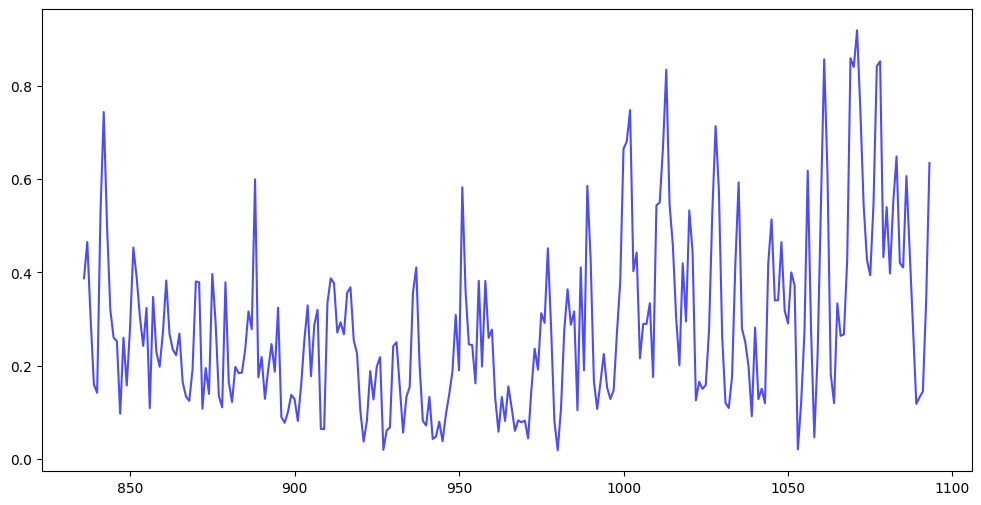

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from tensorflow import keras
from tensorflow.keras import layers

# Load your dataset
df = pd.read_csv("/content/germany-wind-energy.csv")

# Extract wind speed data
wind_speed = df["wind_generation_actual"].values

# Data preprocessing
scaler = MinMaxScaler()
wind_speed = scaler.fit_transform(wind_speed.reshape(-1, 1))

# Create sequences of data
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length - 24):  # Predicting the next 24 hours
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length:i + seq_length + 24])
    return np.array(X), np.array(y)

sequence_length = 24  # Adjust as needed
X, y = create_sequences(wind_speed, sequence_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.80)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
lstm_model = keras.Sequential()
lstm_model.add(layers.LSTM(units=64, activation='tanh', return_sequences=True, input_shape=(sequence_length, 1)))
lstm_model.add(layers.LSTM(units=64, activation='tanh'))
lstm_model.add(layers.Dense(24))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

# Train the LSTM model
lstm_model.fit(X_train, y_train, epochs=20, batch_size=64)

# Make predictions with LSTM
lstm_pred = lstm_model.predict(X_test)

# Calculate RMSE for LSTM
y_test_1d = y_test.reshape(-1)
lstm_pred_1d = lstm_pred.reshape(-1)
lstm_rmse = sqrt(mean_squared_error(y_test_1d, lstm_pred_1d))
print(f"LSTM RMSE: {lstm_rmse}")

# Plot the results
plt.figure(figsize=(12, 6))
time_steps = range(train_size, len(wind_speed))

# Plot actual wind speed
plt.plot(time_steps, wind_speed[train_size:], label='Actual Wind Speed', color='blue', alpha=0.7)

# Plot LSTM predicted wind speed
lstm_pred_flat = lstm_pred.reshape(-1)
plt.plot(time_steps[-len(lstm_pred_flat):], lstm_pred_flat, label='LSTM Predicted Wind Speed', color='red', alpha=0.7)

plt.legend()
plt.title('LSTM Wind Speed Forecasting for Next 24 Hours')
plt.xlabel('Time Steps')
plt.ylabel('Wind Speed (Normalized)')
plt.show()


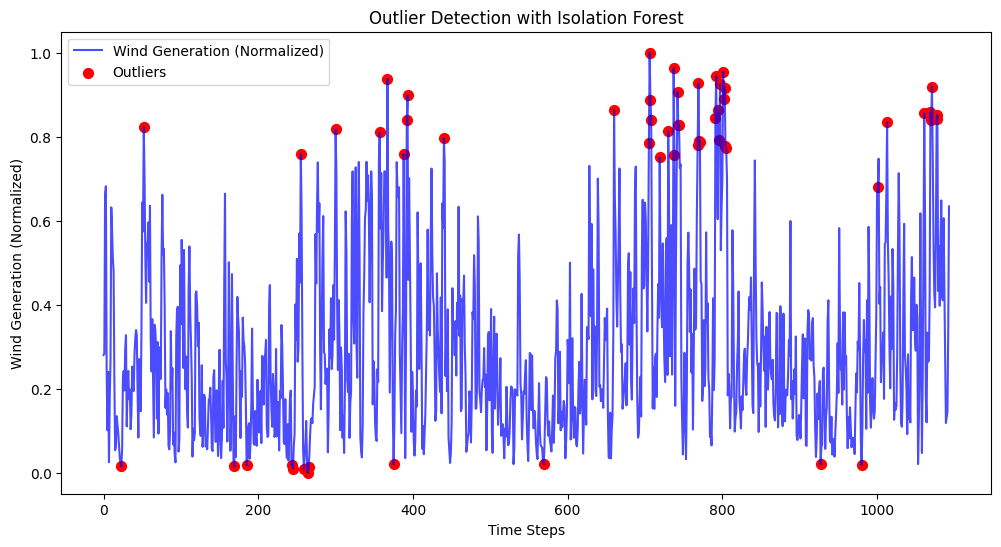

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler

# Load your dataset
df = pd.read_csv("/content/germany-wind-energy.csv")

# Extract wind generation actual data
wind_generation_actual = df["wind_generation_actual"].values

# Data preprocessing
scaler = MinMaxScaler()
wind_generation_actual = scaler.fit_transform(wind_generation_actual.reshape(-1, 1))

# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # Adjust contamination as needed
iso_forest.fit(wind_generation_actual)

# Predict outliers
outliers = iso_forest.predict(wind_generation_actual)

# Create a plot to visualize outliers
plt.figure(figsize=(12, 6))
time_steps = range(len(wind_generation_actual))

plt.plot(time_steps, wind_generation_actual, label='Wind Generation (Normalized)', color='blue', alpha=0.7)

# Mark outliers with red dots
outliers_indices = np.where(outliers == -1)
outliers_values = wind_generation_actual[outliers_indices]
plt.scatter(outliers_indices, outliers_values, color='red', label='Outliers', s=50)

plt.legend()
plt.title('Outlier Detection with Isolation Forest')
plt.xlabel('Time Steps')
plt.ylabel('Wind Generation (Normalized)')
plt.show()


Epoch 1/20
14/14 [==============================] - 6s 34ms/step - loss: 0.0884
Epoch 2/20
14/14 [==============================] - 1s 56ms/step - loss: 0.0444
Epoch 3/20
14/14 [==============================] - 1s 57ms/step - loss: 0.0430
Epoch 4/20
14/14 [==============================] - 1s 60ms/step - loss: 0.0421
Epoch 5/20
14/14 [==============================] - 1s 52ms/step - loss: 0.0423
Epoch 6/20
14/14 [==============================] - 0s 33ms/step - loss: 0.0417
Epoch 7/20
14/14 [==============================] - 0s 35ms/step - loss: 0.0417
Epoch 8/20
14/14 [==============================] - 0s 34ms/step - loss: 0.0416
Epoch 9/20
14/14 [==============================] - 0s 34ms/step - loss: 0.0414
Epoch 10/20
14/14 [==============================] - 0s 33ms/step - loss: 0.0417
Epoch 11/20
14/14 [==============================] - 0s 34ms/step - loss: 0.0413
Epoch 12/20
14/14 [==============================] - 0s 34ms/step - loss: 0.0414
Epoch 13/20
14/14 [==================

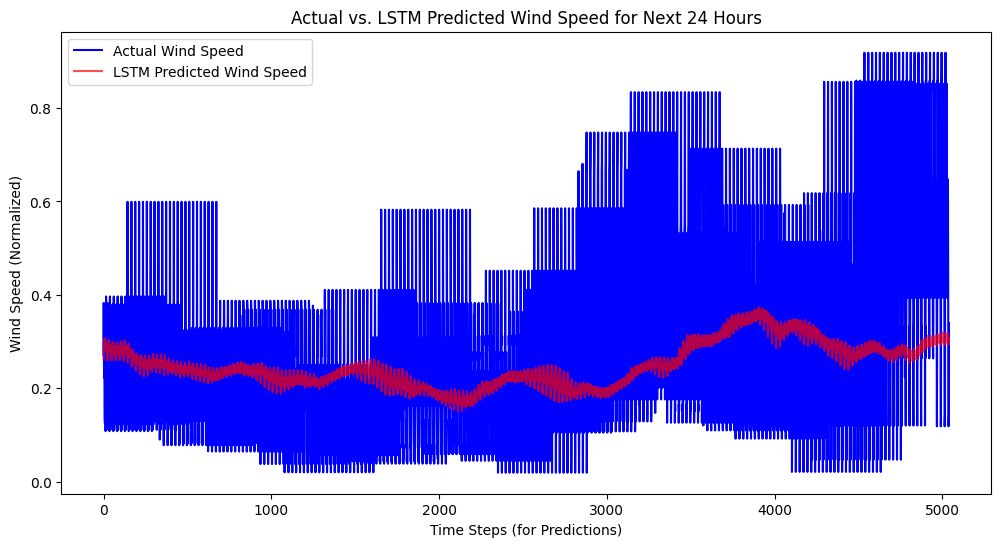

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from tensorflow import keras
from tensorflow.keras import layers

# Load your dataset
df = pd.read_csv("/content/germany-wind-energy.csv")

# Extract wind speed data
wind_speed = df["wind_generation_actual"].values

# Data preprocessing
scaler = MinMaxScaler()
wind_speed = scaler.fit_transform(wind_speed.reshape(-1, 1))

# Create sequences of data
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length - 24):  # Predicting the next 24 hours
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length:i + seq_length + 24])
    return np.array(X), np.array(y)

sequence_length = 24  # Adjust as needed
X, y = create_sequences(wind_speed, sequence_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.80)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
lstm_model = keras.Sequential()
lstm_model.add(layers.LSTM(units=64, activation='tanh', return_sequences=True, input_shape=(sequence_length, 1)))
lstm_model.add(layers.LSTM(units=64, activation='tanh'))
lstm_model.add(layers.Dense(24))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

# Train the LSTM model
lstm_model.fit(X_train, y_train, epochs=20, batch_size=64)

# Make predictions with LSTM
lstm_pred = lstm_model.predict(X_test)

# Calculate RMSE for LSTM
y_test_1d = y_test.reshape(-1)
lstm_pred_1d = lstm_pred.reshape(-1)
lstm_rmse = sqrt(mean_squared_error(y_test_1d, lstm_pred_1d))
print(f"LSTM RMSE: {lstm_rmse}")

# Time steps for predictions
time_steps_pred = range(len(y_test_1d))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(time_steps_pred, y_test_1d, label='Actual Wind Speed', color='blue')
plt.plot(time_steps_pred, lstm_pred_1d, label='LSTM Predicted Wind Speed', color='red', alpha=0.7)
plt.legend()
plt.title('Actual vs. LSTM Predicted Wind Speed for Next 24 Hours')
plt.xlabel('Time Steps (for Predictions)')
plt.ylabel('Wind Speed (Normalized)')
plt.show()


Epoch 1/20
14/14 [==============================] - 6s 36ms/step - loss: 140034719744.0000
Epoch 2/20
14/14 [==============================] - 0s 35ms/step - loss: 140034129920.0000
Epoch 3/20
14/14 [==============================] - 1s 37ms/step - loss: 140033343488.0000
Epoch 4/20
14/14 [==============================] - 0s 35ms/step - loss: 140032507904.0000
Epoch 5/20
14/14 [==============================] - 1s 37ms/step - loss: 140031705088.0000
Epoch 6/20
14/14 [==============================] - 0s 35ms/step - loss: 140030967808.0000
Epoch 7/20
14/14 [==============================] - 1s 36ms/step - loss: 140030263296.0000
Epoch 8/20
14/14 [==============================] - 0s 34ms/step - loss: 140029607936.0000
Epoch 9/20
14/14 [==============================] - 0s 35ms/step - loss: 140028952576.0000
Epoch 10/20
14/14 [==============================] - 0s 34ms/step - loss: 140028313600.0000
Epoch 11/20
14/14 [==============================] - 1s 36ms/step - loss: 140027674624.00

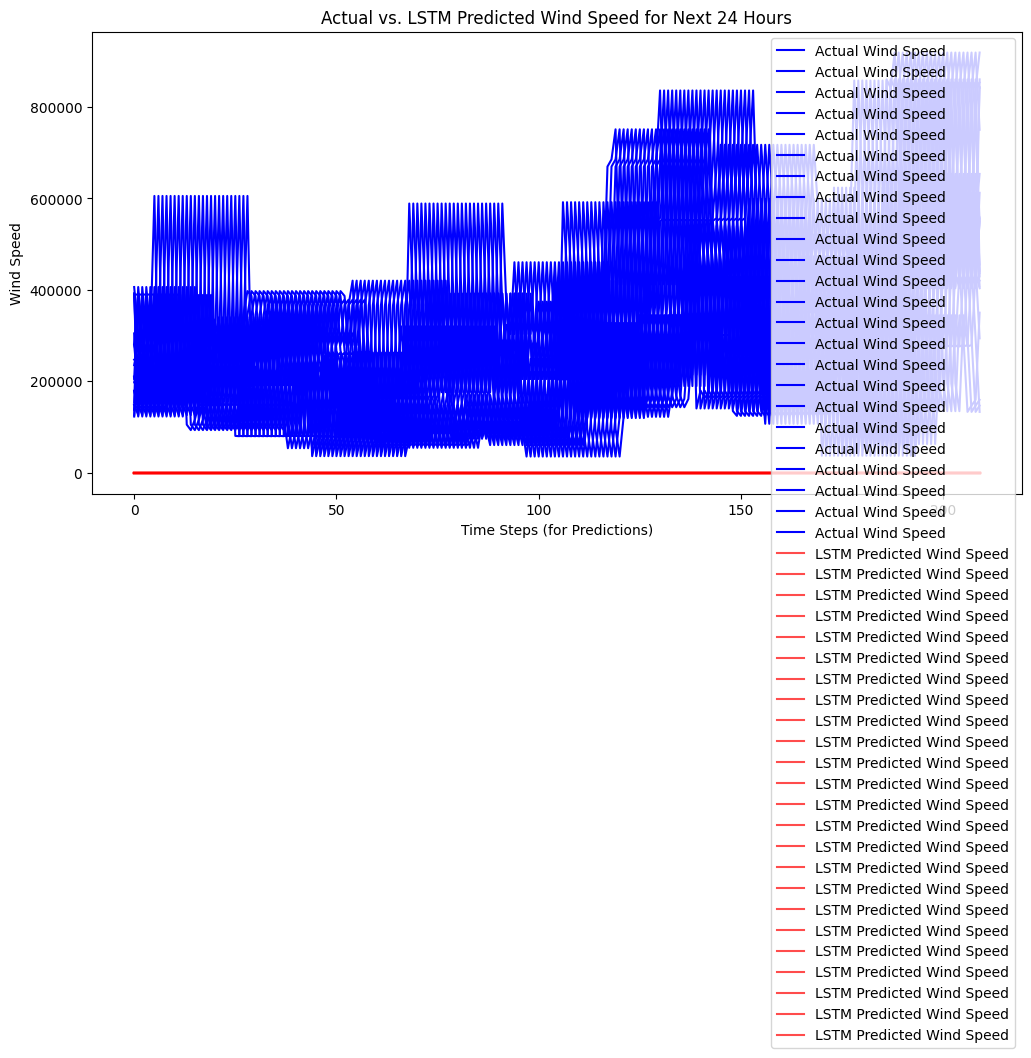

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from tensorflow import keras
from tensorflow.keras import layers

# Load your dataset
df = pd.read_csv("/content/germany-wind-energy.csv")

# Extract wind speed data
wind_speed = df["wind_generation_actual"].values

# Create sequences of data
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length - 24):  # Predicting the next 24 hours
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length:i + seq_length + 24])
    return np.array(X), np.array(y)

sequence_length = 24  # Adjust as needed
X, y = create_sequences(wind_speed, sequence_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.80)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
lstm_model = keras.Sequential()
lstm_model.add(layers.LSTM(units=64, activation='tanh', return_sequences=True, input_shape=(sequence_length, 1)))
lstm_model.add(layers.LSTM(units=64, activation='tanh'))
lstm_model.add(layers.Dense(24))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

# Train the LSTM model
lstm_model.fit(X_train, y_train, epochs=20, batch_size=64)

# Make predictions with LSTM
lstm_pred = lstm_model.predict(X_test)

# Calculate RMSE for LSTM
lstm_rmse = sqrt(mean_squared_error(y_test, lstm_pred))
print(f"LSTM RMSE: {lstm_rmse}")

# Time steps for predictions
time_steps_pred = range(len(y_test))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(time_steps_pred, y_test, label='Actual Wind Speed', color='blue')
plt.plot(time_steps_pred, lstm_pred, label='LSTM Predicted Wind Speed', color='red', alpha=0.7)
plt.legend()
plt.title('Actual vs. LSTM Predicted Wind Speed for Next 24 Hours')
plt.xlabel('Time Steps (for Predictions)')
plt.ylabel('Wind Speed')
plt.show()
